# ***~ Mini Project on Used Cars Data ~***

### About the project
There is a huge demand for used cars in the US Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. XYZ is a budding automobile company that aspires to enter the Used-car market by setting up their company locally to give competition to their counterparts. Some car sellers replace their old cars with pre-owned cars instead of buying new ones. Used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market. We have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.  

The objective of the project is to discuss the features of used-car with regard to its influence on the market price. Based on such analysis, a model for price prediction could be constructed in order to provide a real-time used-car evaluation service. The final product takes features (transmission, owner, fuel, seller_type,etc) of a used-car as input and output a prediction of price. Moreover, it should be capable of producing an interval prediction as price range, and it should be able to handle missing features so that the user can make a query even when they are not clear about certain feature. As a more ambitous attempt, a recommender system could be build such that we can not only evaluate the price, but also recommend features for car search by the potential buyers, based on the expected price and desired features.

### $Table of Contents:$
1. #### **Introduction**
2. #### **Data Cleaning/ Data Manipulation**
3. #### **Feature Engineering**
4. #### **Exploratory Data Analysis** 
5. #### **Statistical Analysis**
6. #### **Conclusion**

___

# 1. Introduction

### I. Dataset Description
It’s the data of used cars which aspires to enter the Used-car market by setting up their company locally to give competition to their counterparts.It is important to analyse all the features on the car to know if the car is a good purchase for second hand owner or not.  
**This data importantly consisting of car data**:
1. Sales_ID : Sales ID
2. name : Name of the car which includes Brand name and Model name
3. year: Year of the car purchase
4. selling_price: Current selling price for used in INR Lakhs (1 Lakh = 100, 000)
5. km_driven: Total kilometers driven in the car by the previous owner(s) in KM.
6. Region: Region where it is used
7. State or Province: State or Province where it is used
8. City: City where it is used
9. fuel: Type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
10. seller_type: Who is selling the car
11. transmission: Type of transmission used by the car. (Automatic / Manual)
12. owner: Type of ownership
13. mileage: The standard mileage offered by the car company in kmpl or km/kg
14. engine: Engine power in CC
15. max_power:Maximum power of the engine in bhp.
16. torque: Measurement of your car's ability to do work
17. seats: Number of seats in the car.
18. sold: used car sold or not

#### In the statistical analysis and visualisation part of this project, we will discuss some questions like:
- Which brands of cars are common in used cars?
- Which models of cars are common in used cars?
- Which fuel type is more common in used cars?
- Does the car fuel type affect the selling price?
- Does the city have an effect on the selling price?
- Which cities have the highest and lowest number of used cars?  



- Does various predicating factors effect the price of the used car .?
- What all independent variables effect the pricing of used cars?
- Does name of a car have any effect on pricing of car.?
- How does type of Transmission effect pricing?
- Does Location in which the car being sold has any effect on the price?
- Does kilometers_Driven,Year of manufacturing have negative correlation with price of the car?
- Does Mileage ,Engine and Power have any effect on the pricing of the car?
- How does number of seat ,Fuel type effect the pricing.?


### II. Import Libraries

In [538]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import matplotlib.pyplot as plt
import statistics
import scipy.stats as stats
import plotly.express as px
import statsmodels.api as smi 
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
import seaborn as sns
import statsmodels.stats as stm
import sklearn
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

### III. Read and Understand data

**Reading the csv file - UsedCarsData.csv**

In [471]:
df = pd.read_csv('UsedCarsData.csv')
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 7906 rows and 18 columns


**To see the contents of dataset**

In [472]:
df.head() 

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti Swift Dzire VDI,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5,Y
1,2,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5,Y
2,3,Honda City 2017-2020 EXi,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai i20 Sportz Diesel,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti Swift VXI BSIII,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5,Y


**Fetching details of dataframe like dimension, datatype, whether it consist any null values, etc.**

In [473]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sales_ID           7906 non-null   int64 
 1   name               7906 non-null   object
 2   year               7906 non-null   int64 
 3   selling_price      7906 non-null   int64 
 4   km_driven          7906 non-null   int64 
 5   Region             7906 non-null   object
 6   State or Province  7906 non-null   object
 7   City               7906 non-null   object
 8   fuel               7906 non-null   object
 9   seller_type        7906 non-null   object
 10  transmission       7906 non-null   object
 11  owner              7906 non-null   object
 12  mileage            7906 non-null   object
 13  engine             7906 non-null   object
 14  max_power          7906 non-null   object
 15  torque             7906 non-null   object
 16  seats              7906 non-null   int64 


**By using the info function, we can pull the following information from our dataset :**
- We have 5 numerical variables and  13 non-numerical variables.
- There is no null values present in our dataset.
- There is problem with 3 columns datatypes. We need to change the datatype of "mileage","engine","max_power" column into int64 so that it can be used for further calculations.
- Torque variable is a string and has multiple units like kgm and rpm, therefore we will be dropping this variable later in the process as it involves coverting multiple units into single unit.

##### Creating a function named column_list to "Check number of unique values in each column"

In [474]:
column_list = list(df.columns)
for col in column_list:
    print('{} :'.format(col), df[col].nunique()) 

Sales_ID : 7906
name : 1982
year : 27
selling_price : 670
km_driven : 898
Region : 4
State or Province : 49
City : 1310
fuel : 4
seller_type : 3
transmission : 2
owner : 5
mileage : 393
engine : 121
max_power : 320
torque : 441
seats : 9
sold : 2


##### Checking all the unique values for important categorical feature

In [475]:
print("fuel:", df["fuel"].unique())
print("----")
print("seller_type:", df["seller_type"].unique())
print("----")
print("transmission:", df["transmission"].unique())
print("----")
print("owner:", df["owner"].unique())
print('----')
print("sold:", df["sold"].unique())

fuel: ['Diesel' 'Petrol' 'LPG' 'CNG']
----
seller_type: ['Individual' 'Dealer' 'Trustmark Dealer']
----
transmission: ['Manual' 'Automatic']
----
owner: ['First Owner' 'Second Owner' 'Third Owner' 'Fourth & Above Owner'
 'Test Drive Car']
----
sold: ['Y' 'N']


# 2. Data Cleaning / Data Manipulation
First step after understanding used cars dataset is to check for null values & duplicates for each columns, followed by converting datatype of some columns as integer and removing irrelevant/useless features like "Sales_ID", "torque", etc. 

### I. Checking For Missing Values

In [476]:
df.isnull().sum()

Sales_ID             0
name                 0
year                 0
selling_price        0
km_driven            0
Region               0
State or Province    0
City                 0
fuel                 0
seller_type          0
transmission         0
owner                0
mileage              0
engine               0
max_power            0
torque               0
seats                0
sold                 0
dtype: int64

**Insight:** Data is clean, no missing values are found.

### II. Checking For Duplicate Values

In [477]:
df.duplicated().sum()

0

**Insight:** Data is clean, no duplicate values are found.

### III. Datatype for mileage, engine, max_power are object because of unit assigned , so striping units.
Dropping units from mileage (kmpl), engine (CC) & max_power(bhp) to convert them into numerical datatype.  
Converting mileage & max_power datatype into float and engine datatype into integer values

In [478]:
df["mileage"] = df["mileage"].str.split(' ').str.get(0).astype(float)
df["engine"] = df["engine"].str.split(' ').str.get(0).astype("int64")
df["max_power"] = df["max_power"].str.split(' ').str.get(0).astype(float)

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

**Insight:** Mileage, engine and max_power is changed into numerical datatype.

### III. Dropping unneeded columns from the dataset
There are few columns which we will not need for the analysis so removing them will make the dataframe size smaller and then faster to explore.

In [480]:
df.drop(["Sales_ID", "torque"], axis = 1, inplace = True)

In [481]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'Region',
       'State or Province', 'City', 'fuel', 'seller_type', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats', 'sold'],
      dtype='object')

**Insight:** Sales_ID and torque column is removed.

### IV. Creating Numeric and Non Numeric feature lists

In [482]:
num_columns = df.select_dtypes(['int64','float64']).columns
cat_columns = df.select_dtypes(['object']).columns
print(num_columns)
print(cat_columns)

Index(['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'seats'],
      dtype='object')
Index(['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type',
       'transmission', 'owner', 'sold'],
      dtype='object')


# 3. Feature Engineering
In this section, we will create some useful variables like age, brands,etc in order to better understand our dataset and reveal precious information.

### I. Processing name column to derive Brand & Model name
As mentioned in dataset car name has brand and model name so extracting it.    
Brands do play an important role in the Car's selling price selection.

In [483]:
df['Brand'] = df['name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['name'].str.split(' ').str[1] + " " + df['name'].str.split(' ').str[2]

In [484]:
df.Brand.nunique()

31

In [485]:
df.groupby(df.Brand).size().sort_values(ascending =False).nlargest(10)

Brand
Maruti        2367
Hyundai       1360
Mahindra       758
Tata           719
Honda          466
Toyota         452
Ford           388
Chevrolet      230
Renault        228
Volkswagen     185
dtype: int64

**Insight:** There are 31 unique Brands in the dataset.   
#### Maruti brand is selling the most used cars.

In [486]:
df.Model.nunique()

664

In [487]:
df.groupby('Model')['Model'].size().nlargest(10)

Model
Swift Dzire         376
Wagon R             282
Grand i10           194
Innova 2.5          185
Alto 800            144
Bolero 2011-2019    116
Swift VDI           116
Verna 1.6           112
Alto K10            110
Alto LXi             92
Name: Model, dtype: int64

**Insight:** There are 664 unique models and Swift Dzire is most popular Model.

### II. Processing year column to derive Age of car
Since year ranges between 1995-2017 which will not help to understand its effect on selling price. Therefore, we create two new columns Current year and Age.  
Current year would be 2021 and Age column would be Age_of_car= Current_year-year. Later we will drop current_year column

In [488]:
df['Current_year']=2023
df['Age_of_car']=df['Current_year']-df['year']
df.groupby(df.Age_of_car).size().sort_values(ascending =False).nlargest(5)

Age_of_car
6     1010
7      856
5      806
8      775
10     668
dtype: int64

**Insight:** Maximum Age of used cars is 6 years, followed by 7 and 5 years.

##### Remove name and current year column

In [489]:
df.drop(["name", "Current_year"], axis = 1, inplace = True)

##### Rearranging The DataFrame

In [490]:
df.reset_index(inplace=True, drop=True) 

##### Checking all the new columns created (Brand, Model and Age)

In [491]:
df.head()

,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Brand,Model,Age_of_car
0,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.400,1248,74.000,5,Y,Maruti,Swift Dzire,9
1,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.140,1498,103.520,5,Y,Skoda,Rapid 1.5,9
2,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.700,1497,78.000,5,Y,Honda,City 2017-2020,17
3,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.000,1396,90.000,5,Y,Hyundai,i20 Sportz,13
4,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.100,1298,88.200,5,Y,Maruti,Swift VXI,16


### III. Deriving new column for less used cars
**Less used cars are generally considered as good cars, according to sources cars below 50k kms driven is a good car.**

In [492]:
expected_kms = 50000
temp = []
for i in df["km_driven"]:
    if(i<=expected_kms):
        temp.append(int(1))
    else:
        temp.append(int(0))

In [493]:
df['distance below 50k kms'] = temp
df.head()

,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,sold,Brand,Model,Age_of_car,distance below 50k kms
0,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First Owner,23.400,1248,74.000,5,Y,Maruti,Swift Dzire,9,0
1,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second Owner,21.140,1498,103.520,5,Y,Skoda,Rapid 1.5,9,0
2,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third Owner,17.700,1497,78.000,5,Y,Honda,City 2017-2020,17,0
3,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First Owner,23.000,1396,90.000,5,Y,Hyundai,i20 Sportz,13,0
4,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First Owner,16.100,1298,88.200,5,Y,Maruti,Swift VXI,16,0


In [494]:
df['distance below 50k kms'].value_counts(normalize= True)*100

0   58.108
1   41.892
Name: distance below 50k kms, dtype: float64

**Insight:** 41.89% of the used cars in the dataset has covered distance of 50k kms or less. 

# 4. Exploratory Data Analysis
Now that we've trimmed and cleaned the data, we're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### I. Dependent variable visualization: Selling Price

count        7906.000000
mean       649813.720845
std        813582.748354
min         29999.000000
25%        270000.000000
50%        450000.000000
75%        690000.000000
max      10000000.000000
Name: selling_price, dtype: object


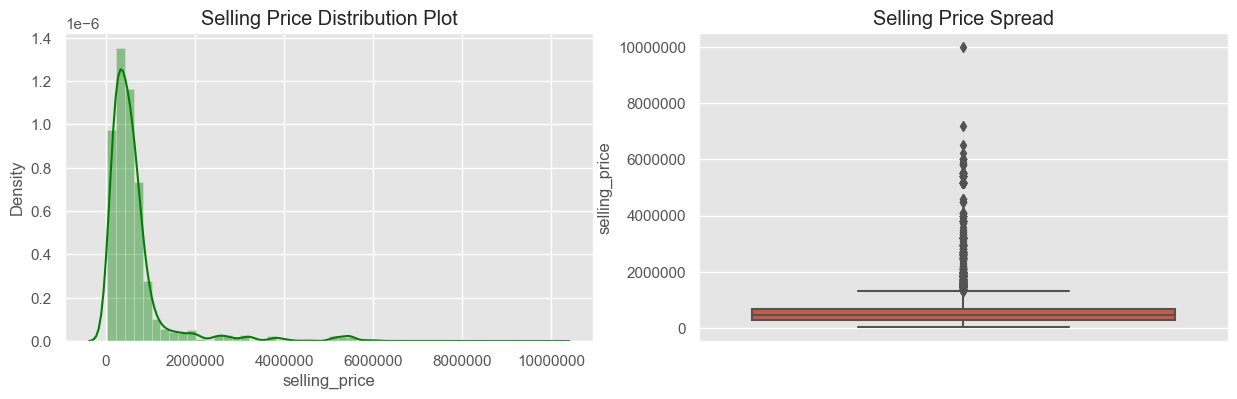

In [495]:
print(df["selling_price"].describe().apply(lambda x: format(x, 'f')))
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.title('Selling Price Distribution Plot')
sns.distplot(df.selling_price,color='green', kde = True)
plt.ticklabel_format(style='plain', axis='x')

plt.subplot(1,2,2)
plt.title('Selling Price Spread')
sns.boxplot(y=df.selling_price)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

**Insight:**  
- Since we have mean > median, then our distribution is positively asymmetric, as we can see in the above histogram.
- According to the box-mustache, the price field has an average around 13K and a median around 10k with the most expensive car values at 45k and the cheapest cars at 5k.
- The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 15,000).
- There is a significant difference between the mean and the median of the price distribution.
- The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are - below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)
- Most of the selling prices offered to customers are low.

- As seen below, we have 75% prices are around 16k, or 25% between 17k and 45k.


### II. Univariate Analysis

**Which brands are selling the most in used cars?**

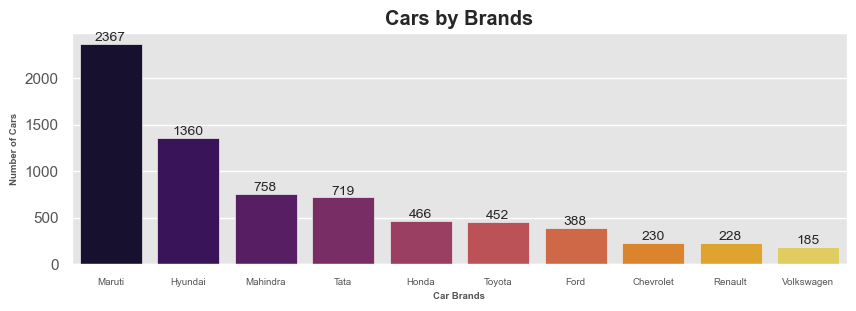

In [496]:
brand_names = df["Brand"].value_counts().head(10).index
brand_count = df['Brand'].value_counts().head(10).values

plt.figure(figsize=(10,3))
ax = sns.barplot(y = brand_count , x = brand_names, orient='v', palette='inferno')
ax.set_xlabel(xlabel='Car Brands', fontdict = {'size' : 'x-small','fontweight' : 'bold'})
ax.set_ylabel(ylabel='Number of Cars', fontdict = {'size' : 'x-small','fontweight' : 'bold'})
ax.set_title("Cars by Brands", fontdict = {'size' : 'x-large', 'fontweight' : 'bold'})
ax.bar_label(ax.containers[0])
ax.set_xticklabels(brand_names, fontsize=7)
plt.show()

**Insight:**   
- **Maruti** and **Hyundai** occupies huge volumes in used car market due to its higher sales than competitors.  
- ***Brand influences the selling price, and the chart above confirms that it is true for our data.***

**Which year records the maximum sale in used cars?**

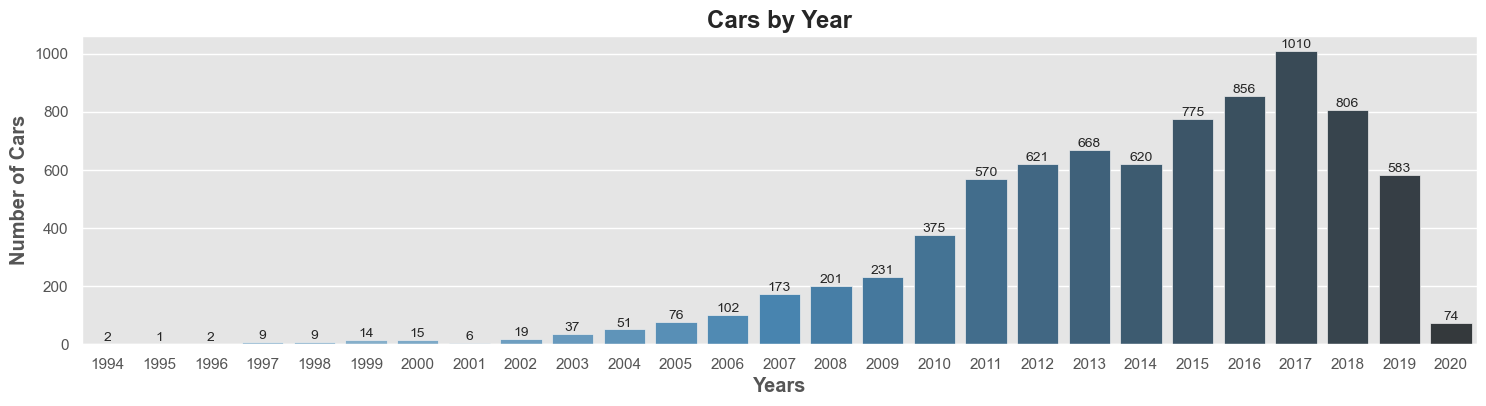

In [497]:
cars_by_year = df.groupby(['year']).agg({'Brand':'count'}).reset_index()

plt.figure(figsize=(18,4))
ax = sns.barplot(y = cars_by_year['Brand'] , x = cars_by_year['year'], orient='v', palette="Blues_d")
ax.set_xlabel(xlabel='Years', fontdict = {'size' : 'x-large', 'fontweight' : 'bold'})
ax.set_ylabel(ylabel='Number of Cars', fontdict = {'size' : 'x-large', 'fontweight' : 'bold'})
ax.set_title("Cars by Year", fontdict = {'size' : 'xx-large', 'fontweight' : 'bold'})
ax.bar_label(ax.containers[0])
plt.show()

**Insight:**
- Used cars volume in market has peaked in 2017.
- Selling Price of Newest is high compared to old models.

**Top 5 cities that are most common in used cars?**

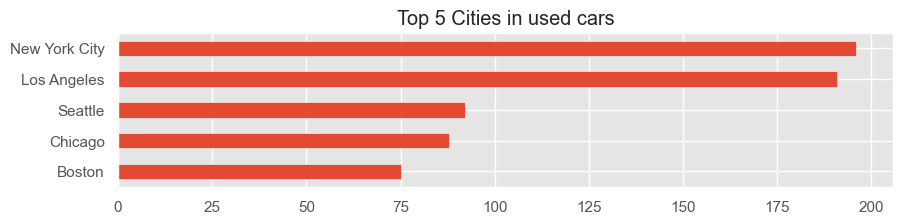

In [498]:
plt.figure(figsize=(10,2))
df['City'].value_counts()[:5].sort_values(ascending=True).plot(kind='barh')
plt.title("Top 5 Cities in used cars")
plt.show()

#### **Visualising other Categorical variables**

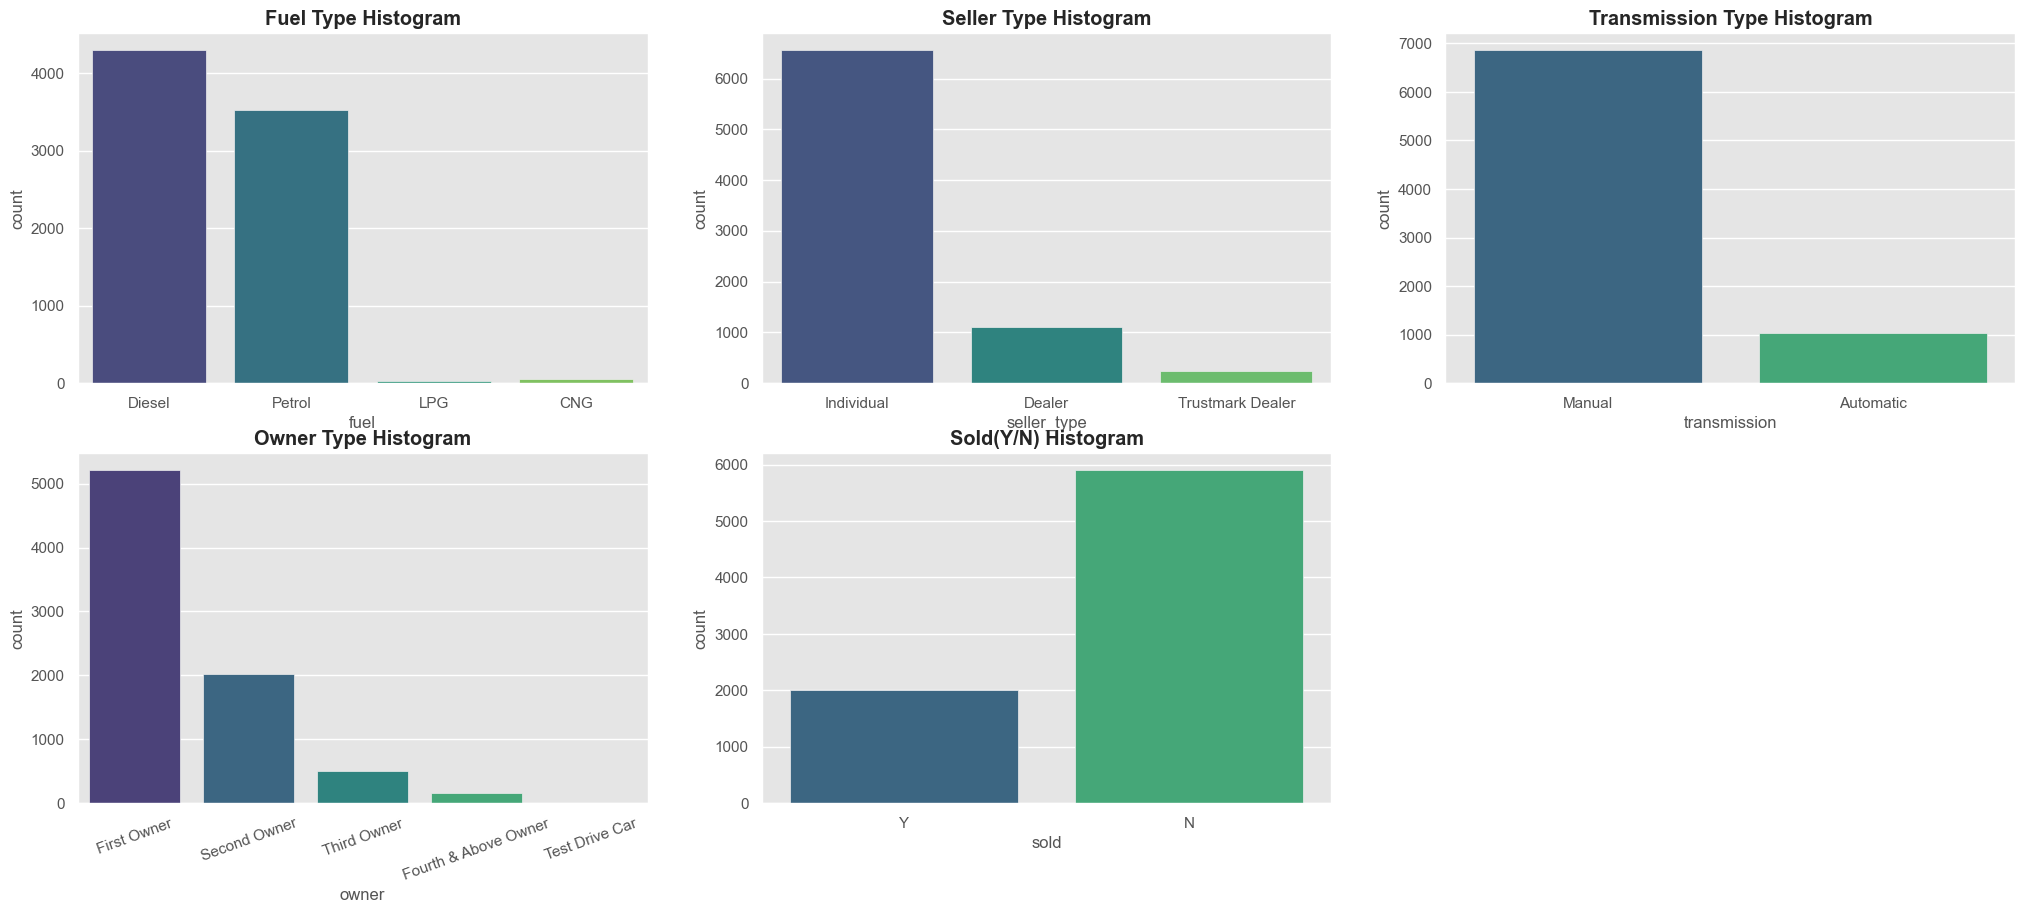

In [499]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
plt.title("Fuel Type Histogram", fontdict = {'size' : 'x-large','fontweight' : 'bold'})
sns.countplot(df.fuel, palette=("viridis"))

plt.subplot(2,3,2)
plt.title('Seller Type Histogram', fontdict = {'size' : 'x-large','fontweight' : 'bold'})
sns.countplot(df.seller_type, palette=("viridis"))

plt.subplot(2,3,3)
plt.title("Transmission Type Histogram", fontdict = {'size' : 'x-large','fontweight' : 'bold'})
sns.countplot(df.transmission, palette=('viridis'))

plt.subplot(2,3,4)
plt.title('Owner Type Histogram', fontdict = {'size' : 'x-large','fontweight' : 'bold'})
sns.countplot(df.owner, palette=("viridis"))
plt.xticks(rotation= 20)

plt.subplot(2,3,5)
plt.title('Sold(Y/N) Histogram', fontdict = {'size' : 'x-large','fontweight' : 'bold'})
sns.countplot(df.sold, palette=("viridis"))


plt.show()


**Observations:**

- **Does the car fuel type affect the selling price?**
- Most of the cars owned by the people are of Diesel Type.
- People are buying more Diesel Cars then Petrol and other fuel types.

- **Which seller type is more common in used cars?**
- Most of the seller type is Individuals only.
- We can see that Individual sellers are dominating used cars market.

- **Which transmission type is more common in the used cars market?**
- Manual cars are more in demand as compared to Automatic type.

- **Which ownership is more common in used cars?**
- Majority of the used cars are owned by individual sellers.
- First owner used cars has consumed majority of the market while Four+ Owner Cars are a dying breed.

- **Whether used cars are sold or not?**
- Most of the used cars are not yet sold by the company.


### III. Bivariate & Multivariate Analysis

**Selling Price Vs kms Driven**

In [500]:
fig = px.scatter(x=df['km_driven'], y=df['selling_price'], symbol=df['Brand'], labels={'x' : 'Kms Driven', 'y' : 'Price(Rs)'})
fig.show()

**Insight:**  
In general, the mean and deviation of selling prices increase with each year, and cars with automatic transmission tend to be more expensive.

**Price and seats**

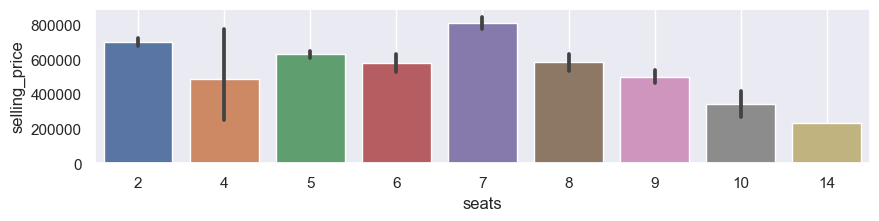

In [501]:
 plt.figure(figsize=(10,2))
sns.set(font_scale=1)
sns.barplot(x='seats', y='selling_price', data=df)
plt.grid()

**Year and transmission features**  
Scatter plot of year and selling_price with transmission marked by color.

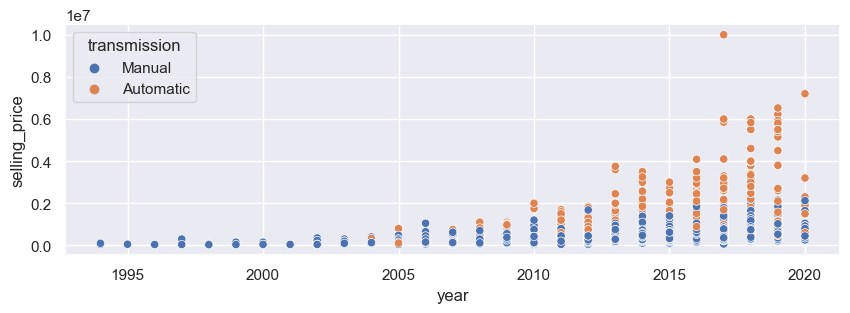

In [502]:
fig, scatter = plt.subplots(figsize = (10,3))
scatter = sns.scatterplot(data=df, x="year", y="selling_price", hue="transmission")

**Insight:**  
In general, the mean and deviation of selling prices increase with each year, and cars with automatic transmission tend to be more expensive.

**km_driven and seller_type features**  
Scatter plot below shows the relation between km_driven, seller_type and selling_price columns.

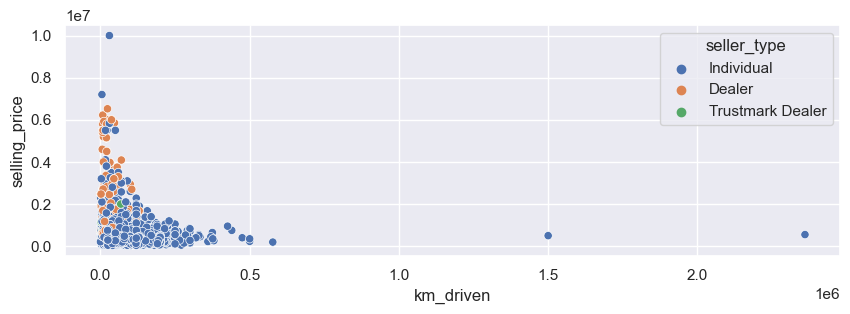

In [503]:
fig, scatter = plt.subplots(figsize = (10,3))
scatter = sns.scatterplot(data=df, x="km_driven", y="selling_price",hue="seller_type", palette="deep")

**Insight:**  
- As can be seen, selling prices tend to go down with the rise of km_driven. Also, cars with 200000-400000 km driven are usually sold by individuals, but any clear pattern between seller_type and selling_price columns is not observed.

**Selling Price, Engine & Transmission feature**

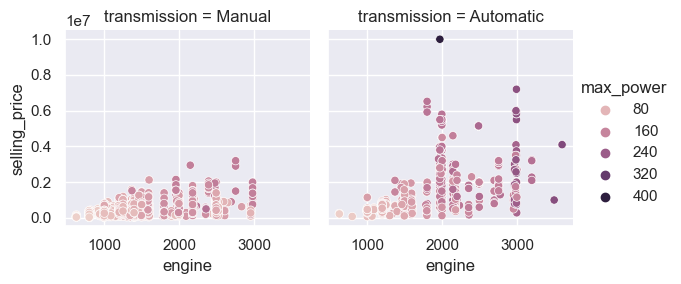

In [504]:
sns.relplot(data=df, y='selling_price',x='engine',col='transmission',aspect=1,height=3,hue="max_power")

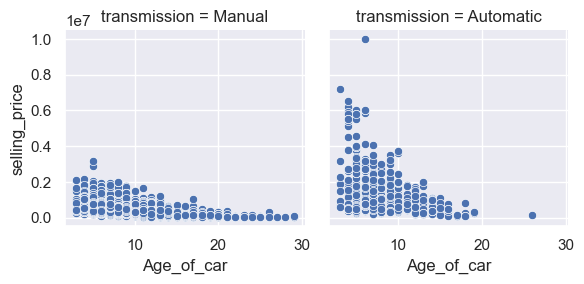

In [505]:
sns.relplot(data=df, y='selling_price',x='Age_of_car',col='transmission',aspect=1,height=3)

**Observations from above exploratory analysis:**
- Selling price mean and deviation have a positive correlation with the year column
- Majority of used cars are in New York & Los Angeles cities.
- Car selling price mean and deviation tend to go down with the rise of the km_driven column.
- 7 and 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older models are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices.
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models
- Engine, Power, how old the car is, Mileage, Fuel type,City,Transmission effect the selling price.

### IV. Correlation Matrix:

- Correlation between features are also important, especially how the features of a car is related to its selling price.
- Therefore, we encode the categorical (of 'object' type) features as intergers, it provides a rough idea about the data.

<AxesSubplot:>

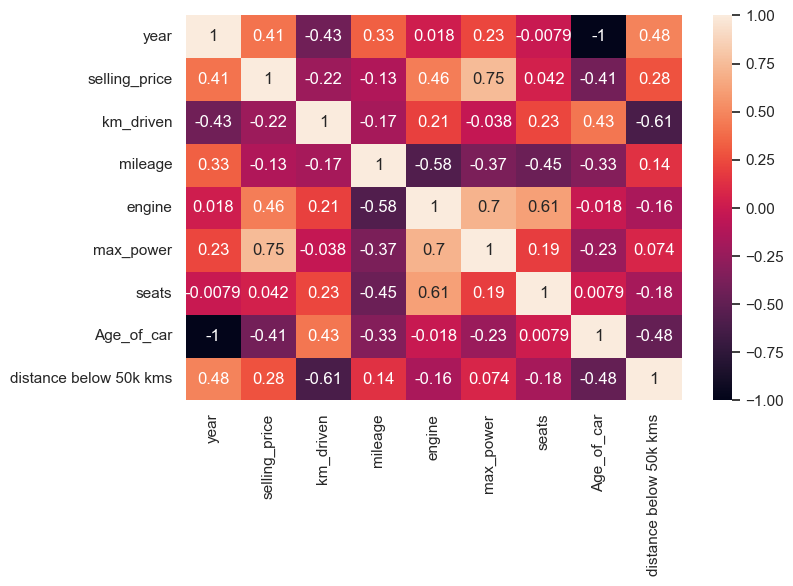

In [506]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)

From the correlation heat map above, it can be observed that power of the car, the kilometer and the number of years used have a major influence on the price. It is understandable that the price is dependent on the performance of the used-car and how new it is.

# Statistical Analysis
**The describe function generates for us the 5-Number summary, particularly useful as a first step in our statistical analysis** 

In [507]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats,Age_of_car
count,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00,7906.00
mean,2013.98,649813.72,69188.66,19.42,1458.71,91.59,5.42,9.02
std,3.86,813582.75,56792.30,4.04,503.89,35.75,0.96,3.86
min,1994.00,29999.00,1.00,0.00,624.00,32.80,2.00,3.00
25%,2012.00,270000.00,35000.00,16.78,1197.00,68.05,5.00,6.00
50%,2015.00,450000.00,60000.00,19.30,1248.00,82.00,5.00,8.00
75%,2017.00,690000.00,95425.00,22.32,1582.00,102.00,5.00,11.00
max,2020.00,10000000.00,2360457.00,42.00,3604.00,400.00,14.00,29.00


**Observation:**
**Analyzing the statistical summary gives us following information:**

- The dataset have used cars with years between 1994 and 2020.
- The mean is more than the median (50%) in selling_price, so the distribution of data is skewed to the right.
- Year is left skewed and has outilers on lower side., This column can be dropped
- Kilometer_driven is right skewed.
- Mileage is almost Normally distrubuted. Has few outliers on upper and lower side. need to check further.
- Engine ,power and price are right skewed and has outliers on upper side.
- Age of car is right skewed.

### Hypothesis Testing

- We have 3 business problems to answer usuing Hypothesis Testing:
- Is the average salary of PhD owners statistically different from Master owners?

- Is the correlation between the annual income and the amount of spending statistically significant?

- Is there correlation between the diploma owned and the marital status?

**Checking the distribution with Skewness**
Selected all quantitative columns for checking the spread

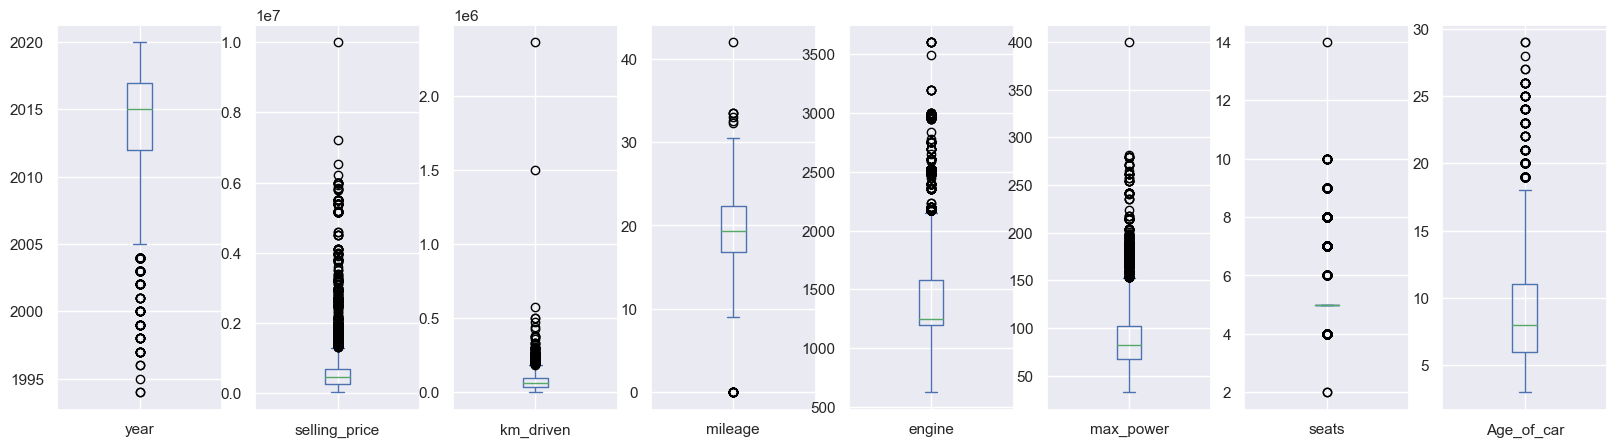

In [508]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data = df[['year', 'selling_price', 'km_driven','mileage','engine','max_power','seats','Age_of_car']]
data.plot(kind='box',figsize=(20,5),subplots=True)
plt.show()

**Test for normality:**  

In [509]:
df.skew()

year                     -0.995
selling_price             4.157
km_driven                11.343
mileage                  -0.142
engine                    1.135
max_power                 1.640
seats                     1.971
Age_of_car                0.995
distance below 50k kms    0.329
dtype: float64

**From the above result, we can immediately see which variable is normally distributed and which is not.**  
**None of the variables are symmetric**
- The variables with skewness > 1 such as selling_price, km_driven,engine, max_power, seats are highly positively skewed.
- The variables with skewness < -1 are highly negatively skewed.
- The variables with 0.5 < skewness < 1 such as Age of car is moderately positively skewed.
- And, The variables with -0.5 < skewness < -1 such as year & mileage is moderately negatively skewed.

In [510]:
inp_array = df["selling_price"]
out_array = np.log10(inp_array)

**Histogram showing no outliers with all of them treated by doing log10 transformation**

<AxesSubplot:xlabel='selling_price', ylabel='Density'>

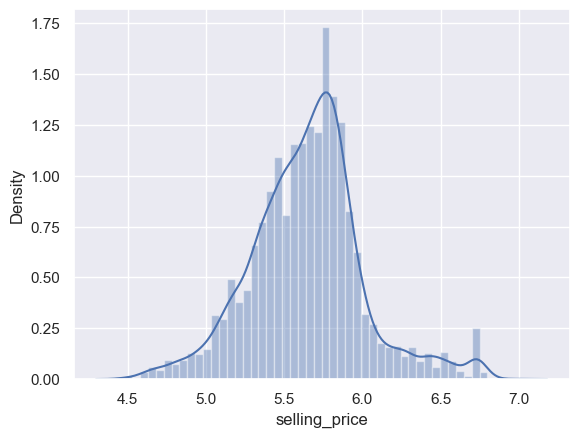

In [511]:
sns.distplot(out_array)

## Categorical variables : Chi-square test for independance

1. To find if there is a significant correlation between the diploma and the marital situation.

2. Hypothesis statement
H_0 : Education and Marital_Situation are independent
H_a : Education and Marital_Situation are not independent 

3. At 95% confidence.


In [535]:
variable =df[['seller_type','transmission']]
crosstab = pd.crosstab(variable["seller_type"], variable["transmission"])
crosstab

transmission,Automatic,Manual
seller_type,,
Dealer,458,649
Individual,484,6079
Trustmark Dealer,99,137


In [536]:
stat, p, dof, expected = chi2_contingency(crosstab)
print('Degree of freedom = %d' % dof)

Degree of freedom = 2


In [537]:
print(expected)

[[ 145.76106754  961.23893246]
 [ 864.16430559 5698.83569441]
 [  31.07462687  204.92537313]]


In [519]:
prob = 0.95
critical = chi2.ppf(prob, dof)
print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

probability=0.950, critical=5.991, stat=1133.875


In [523]:
if abs(stat) >= critical:
    print('Dependent (We reject H0)')
else:
    print('Independent (We fail to reject H0)')
alpha = 1.0 - prob
print('significance=%.3f, p=%.3f' % (alpha, p))
if p <= alpha:
    print('Dependent (We reject H0)')
else:
    print('Independent (We fail to reject H0)')

Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


**Interpretation of the results**

-The Significance level is superior than the P-value of 5%, we fail to reject the null hypothesis.

-The Test-statistic is superior than the critical value, we fail to reject the null hypothesis.

**We can conclude that the seller type is independent from the transmission owned at a 95% confidence level**

## Kruskal-Wallis H-test
**When the null hypothesis is true the test statistic for the Kruskal–Wallis test follows the chi-square distribution**

In [534]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import kruskal
# seed the random number generator
seed(1)
# generate three independent samples
rand1 = df["selling_price"]
rand2 = df["mileage"]
rand3 = df["km_driven"]
# compare samples
stat, p = kruskal(rand1, rand2, rand3)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=20571.457, p=0.000
Different distributions (reject H0)


# Conclusion

**Observations from the analysis**

- The analysis indicates that the most significant predictors of price of used cars are -

-Age of the car
-Number of seats in the car
-Power of the engine
-Mileage
-Kilometers Driven
-Location
-Fuel_Type
-OwnerType
-Transmission - Automatic/Manual
-Newer cars sell for higher prices.

-As the number of seats increases, the price of the car increases.

-Mileage is inversely correlated with Price. Generally, high mileage cars are the lower budget cars.

-Kilometers Driven have a negative relationship with the price which is intuitive. A car that has been driven more will have more wear and tear and hence sell at a lower price, everything else being 0.

-The categorical variables are a little hard to interpret. But it can be seen that all the car_category variables in the dataset have a negative relationship with the Price and the magnitude of this negative relationship decrease as the brand category moves to lower brands.